In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree

In [42]:
data = pd.read_csv("./File/registro_utilizzo_giacca.csv")

data

,temperatura,vel_vento,condizione
0,23.7,0.0,no giacca
1,5.3,7.6,giacca
2,19.8,0.0,no giacca
3,18.3,0.0,no giacca
4,12.3,9.0,giacca
...,...,...,...
360,25.3,0.0,no giacca
361,20.3,0.0,no giacca
362,9.2,18.1,giacca
363,14.6,2.7,giacca


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperatura  365 non-null    float64
 1   vel_vento    365 non-null    float64
 2   condizione   365 non-null    object 
dtypes: float64(2), object(1)
memory usage: 8.7+ KB


In [44]:
X = data[["temperatura","vel_vento"]].values
y = data["condizione"].values

In [63]:
albero_decisionale = tree.DecisionTreeClassifier(max_depth = 8, ccp_alpha=0.0001) 
#un albero ha altezza/profondità,max_depth: distanza tra radice e foglia piu distanti
#ccp_alpha: misura la complessita dell'albero
#sinistra vero destra falso

In [64]:
albero_decisionale.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0001, max_depth=8)

In [65]:
albero_decisionale.score(X,y)

0.9835616438356164

In [66]:
#grafico dell'albero

In [67]:
albero_decisionale.classes_ #restituisce le diverse categorie

array(['giacca', 'no giacca'], dtype=object)

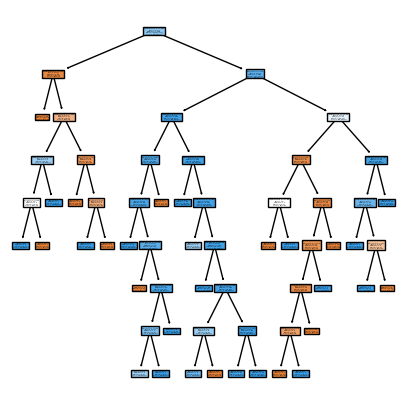

In [68]:
fig, ax = plt.subplots(figsize=(5,5))

tree.plot_tree(albero_decisionale, feature_names=["temperatura","vel_vento"],
              class_names=list(albero_decisionale.classes_), filled=True) #metodo interno


plt.show() 

 *gini*:indice di Gini, matematico italiano, inizio 900, fondatore dell'istat, misura quanto ognuno di questi
  - nodi è puro o impuro, se il nodo classifica bene la variabile target è puro.
  - es giacca il primo ha 66 campioni, di cui 66 giacca, quindi l'indice è molto vicino a zero ->PURO
  - azzurrino: 77 campioni di cui 41 giacca, quindi vicino  a 0,5 ->IMPURO
 
 gini lo ha inventato per stabilire quanto un valore è attendibile 